# Importing Libraries



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from scipy.stats import yeojohnson
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Discovering Our Dataset

In [2]:
df = pd.read_csv('/content/train.csv')
xtest = pd.read_csv('/content/test.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### DROPPING UNNESSCARY FEATURES

In [5]:
unused_f = ["Id","MiscFeature","Fence", "PoolQC", "FireplaceQu", "MasVnrType","Alley"]
df.drop(columns=unused_f,inplace=True)
xtest.drop(columns=unused_f[1:],inplace=True)

In [6]:
df.shape,xtest.shape

((1460, 74), (1460, 75))

### Splitting our dataset into Training set, Test Set

In [7]:
Y = df['SalePrice']
x_train,x_test,y_train,y_test = train_test_split(df,Y,test_size=0.2,random_state=42)
x_train.drop(columns=['SalePrice'],inplace=True)
x_test.drop(columns=['SalePrice'],inplace=True)

In [8]:
x_train.shape, y_train.shape

((1168, 73), (1168,))

# Data Preprocessing

## Data Cleaning

### Checking for Null Values

In [9]:
nlls = df.columns[df.isnull().any()]
nlls

Index(['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

Show Precentage of Null Values

In [10]:
nlls = df.columns[df.isnull().any()]

mv = df[nlls].isnull().sum()
(mv * 100) / 1460

LotFrontage     17.739726
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

Some Stastical Insights

In [11]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Handling Missing Values

In [15]:
# IMPUTING MISSING VALUES WITH MEDIAN DUE TO OUTLIERS
def Missing_Values(d):
    nlls = d.columns[d.isnull().any()].to_list()
    for i in nlls:
        if d[i].dtype == 'O':
            d[i].fillna('None', inplace=True)
        else:
            d[i].fillna(d[i].median(),inplace=True)
    return d

### Splitting features into numeric and categorical

In [16]:
df_num = (df.describe().columns).tolist()
df_cat = df.select_dtypes(include=['object']).columns.tolist()

## Data Exploration For Numeric Features

In [17]:
num_cols = len(df_num)

# Determine grid size
grid_cols = 6
grid_rows = (num_cols + grid_cols - 1) // grid_cols

# Create subplots
fig = make_subplots(rows=grid_rows, cols=grid_cols, subplot_titles=df_num)

# Add scatter plots to each subplot
for i, col in enumerate(df_num):
    row = i // grid_cols + 1
    col_num = i % grid_cols + 1
    fig.add_trace(go.Histogram(x=df[col], name=col, marker=dict(color='blue')), row=row, col=col_num)

# Update layout
fig.update_layout(height=grid_rows * 200, width=grid_cols * 200, title_text=f"Histogram Plots of Numeric Features")

fig.show()

In [18]:
target_col = 'SalePrice'

# Number of columns to plot against the target column
num_cols = len(df_num) - 1  # excluding the target column

# Determine grid size
grid_cols = 6
grid_rows = (num_cols + grid_cols - 1) // grid_cols

# Create subplots
fig = make_subplots(rows=grid_rows, cols=grid_cols, subplot_titles=[col for col in df_num if col != target_col])

# Add scatter plots to each subplot
for i, col in enumerate(df_num):
    if col == target_col:
        continue
    row = i // grid_cols + 1
    col_num = i % grid_cols + 1
    fig.add_trace(go.Scatter(x=df[col], y=df[target_col], mode='markers', marker=dict(color='blue', line=dict(color='black', width=1))), row=row, col=col_num)

# Update layout
fig.update_layout(height=grid_rows * 200, width=grid_cols * 200, title_text=f"Scatter Plots of Numeric Features vs {target_col}")

fig.show()

## HANDELING OUTLEIRS

In [19]:
outliers_indices = x_train[x_train["LotFrontage"] > 200].index
outliers_indices = outliers_indices.union(x_train[x_train["LotArea"] > 100000].index)
outliers_indices = outliers_indices.union(x_train[x_train["TotalBsmtSF"] > 400000].index)
outliers_indices = outliers_indices.union(x_train[x_train["GrLivArea"] > 4500].index)

x_train.drop(outliers_indices, inplace=True)
y_train.drop(outliers_indices, inplace=True)

In [20]:
num_cols = len(df_num)

# Determine grid size
grid_cols = 6
grid_rows = (num_cols + grid_cols - 1) // grid_cols

# Create subplots
fig = make_subplots(rows=grid_rows, cols=grid_cols, subplot_titles=df_num)

# Add scatter plots to each subplot
for i, col in enumerate(df_num):
    row = i // grid_cols + 1
    col_num = i % grid_cols + 1
    fig.add_trace(go.Box(y=df[col], name=col, marker=dict(color='blue')), row=row, col=col_num)

# Update layout
fig.update_layout(height=grid_rows * 200, width=grid_cols * 200, title_text=f"Box Plots of Numeric Features")

fig.show()

In [21]:
df_n = ['FullBath','HalfBath','BsmtHalfBath','BsmtFullBath','total_fullbaths','total_halfbaths','total_baths','SalePrice']
correlation_matrix = df[df_num].corr()

# Create the heatmap
fig = go.Figure(data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.columns,
        colorscale='Viridis',
        text=correlation_matrix.values,
        texttemplate="%{text:.2f}",
        hoverinfo='z'))

# Update layout
fig.update_layout(
    title='Correlation Heatmap of Numeric Features',
    xaxis=dict(tickangle=-45, tickfont=dict(size=10), automargin=True),
    yaxis=dict(tickfont=dict(size=10), automargin=True),
    width=1000,
    height=1000,
    margin=dict(l=150, r=50, b=150, t=50)
)

fig.show()

In [22]:
cat_f = df[df_cat]
num_cols = len(df_cat)

# Determine grid size
grid_cols = 6
grid_rows = (num_cols + grid_cols - 1) // grid_cols

# Create subplots
fig = make_subplots(rows=grid_rows, cols=grid_cols, subplot_titles=df_cat)

# Add scatter plots to each subplot
for i, col in enumerate(df_cat):
    row = i // grid_cols + 1
    col_num = i % grid_cols + 1
    fig.add_trace(go.Histogram(x=cat_f[col], name=col, marker=dict(color='blue')), row=row, col=col_num)

# Update layout
fig.update_layout(height=grid_rows * 200, width=grid_cols * 200, title_text=f"Histogram Plots of Categorical Features")

fig.show()

In [23]:
target_col = 'SalePrice'

num_cols = len(df_cat)

# Determine grid size
grid_cols = 6
grid_rows = (num_cols + grid_cols - 1) // grid_cols

# Create subplots
fig = make_subplots(rows=grid_rows, cols=grid_cols, subplot_titles=df_cat)

# Add box plots to each subplot
for i, col in enumerate(df_cat):
    row = i // grid_cols + 1
    col_num = i % grid_cols + 1
    fig.add_trace(go.Box(x=cat_f[col], y=df[target_col], name=col, marker=dict(color='blue')), row=row, col=col_num)

# Update layout
fig.update_layout(height=grid_rows * 200, width=grid_cols * 200, title_text=f"Box Plots of SalePrice vs Categorical Features")

fig.show()

## Encoding Categorical Features

In [24]:
def Encoding_Categorical(d,sc_hot=0,sc_ord=0, train_set=False):
    # ONE HOT ENCODING
    cat_hot = ['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
               'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'Electrical',
               'Functional', 'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition']

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), cat_hot)
        ],
        remainder='passthrough'
    )
    if train_set:
        d_transformed = preprocessor.fit_transform(d.copy())
        onehot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_hot)
        remainder_features = [col for col in d.columns if col not in cat_hot]
        new_feature_names = list(onehot_feature_names) + remainder_features

        d_transformed = pd.DataFrame(d_transformed.copy(), columns=new_feature_names, index=d.index)
        d = d_transformed
        sc_hot = preprocessor
        # Apply the transformation
    else:
        d_transformed = sc_hot.transform(d.copy())
        onehot_feature_names = sc_hot.named_transformers_['cat'].get_feature_names_out(cat_hot)
        remainder_features = [col for col in d.columns if col not in cat_hot]
        new_feature_names = list(onehot_feature_names) + remainder_features

        d_transformed = pd.DataFrame(d_transformed.copy(), columns=new_feature_names, index=d.index)
        d = d_transformed

    # ORDINAL ENCODING
    cat_ord =  ['ExterQual','ExterCond','BsmtQual','BsmtCond',
           'HeatingQC','KitchenQual','GarageQual','GarageCond']

    d['LotShape'] = d['LotShape'].map({'None':0,'Reg':1,'IR1':2,'IR2':3,'IR3':4})
    for i in cat_ord:
        d[f'{i}'] = d[f'{i}'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
    d['BsmtExposure'] = d['BsmtExposure'].map({'None':0,'NA':1,'No':2,'Mn':3,'Av':4,'Gd':5})
    d['BsmtFinType1'] = d['BsmtFinType1'].map({'None':0,'NA':1,'Unf':2,'LwQ':3,'Rec':4,'BLQ':5,'ALQ':6,'GLQ':7})
    d['BsmtFinType2'] = d['BsmtFinType2'].map({'None':0,'NA':1,'Unf':2,'LwQ':3,'Rec':4,'BLQ':5,'ALQ':6,'GLQ':7})
    d['Street'] = d['Street'].map({'None':0,'Pave': 1, 'Grvl':2})
    d['Utilities'] = d['Utilities'].map({'None':0,'ELO':1,'NoSeWa':2, 'NoSewr':3, 'AllPub':4})
    d['CentralAir'] = d['CentralAir'].map({'Y': 1, 'N':0})
    d['PavedDrive'] = d['PavedDrive'].map({'N': 0, 'P':1,'Y':2})

    # ORDINAL ENCODER
    cat_ord = ['LandSlope','HouseStyle']
    ord = OrdinalEncoder()
    if train_set:
        d[cat_ord] = ord.fit_transform(d[cat_ord].copy())
        sc_ord = ord
    else:
        d[cat_ord] = sc_ord.transform(d[cat_ord].copy())

    return d,sc_hot,sc_ord

## Feature Engineering

In [25]:
go.Figure(data=go.Scatter(x=df['Exterior1st'],y=df['SalePrice'],mode='markers',marker=dict(color='blue')))

In [26]:
go.Figure(data=go.Scatter(x=df['Exterior2nd'],y=df['SalePrice'],mode='markers',marker=dict(color='blue')))

In [27]:
ft_e = df.copy()
ft_e['Exterior'] = ft_e['Exterior1st'] +[','] + ft_e['Exterior2nd']
go.Figure(data=go.Scatter(x=ft_e['Exterior'],y=ft_e['SalePrice'],mode='markers',marker=dict(color='blue',size=5,opacity=0.1)))

In [28]:
# Spliting the new Feature into categories from the plot
mean_sale_price_by_exterior = ft_e.groupby('Exterior')['SalePrice'].describe()
mean_sale_price_by_exterior.sort_values(by='count',ascending=False)[:20]

,count,mean,std,min,25%,50%,75%,max
Exterior,,,,,,,,
"VinylSd,VinylSd",502.0,214807.689243,80610.998121,37900.0,162497.5,200320.5,249500.0,611657.0
"MetalSd,MetalSd",212.0,149992.353774,55295.236548,62383.0,118375.0,138750.0,164775.0,392000.0
"HdBoard,HdBoard",193.0,166357.740933,69893.469676,83000.0,130000.0,155000.0,181000.0,755000.0
"Wd Sdng,Wd Sdng",177.0,145074.887006,56872.390940,34900.0,111000.0,135000.0,163000.0,475000.0
"Plywood,Plywood",96.0,176610.177083,48654.464628,82500.0,143187.5,169500.0,199675.0,320000.0
"CemntBd,CmentBd",59.0,227578.474576,115477.212364,75000.0,117250.0,236500.0,299238.5,556581.0
"BrkFace,BrkFace",24.0,198143.750000,96413.871581,40000.0,133750.0,162750.0,255000.0,430000.0
"HdBoard,Plywood",23.0,144810.869565,23781.677231,112000.0,131375.0,142500.0,151500.0,225000.0
"Stucco,Stucco",20.0,158137.500000,77299.812813,58500.0,111500.0,142000.0,191550.0,381000.0


In [29]:
# Feature Engineering Function
def Feature_Engineering(d):
    d['Total_area'] = d["TotalBsmtSF"] + d["GrLivArea"]
    d["total_fullbaths"] = d["BsmtFullBath"] + d["FullBath"] + (0.5*d["BsmtHalfBath"]) + (0.5*d["HalfBath"])
    d["Exterior"] = d["Exterior1st"] +"," + d["Exterior2nd"]
    d["Exterior"] = d["Exterior"].map({'VinylSd,VinylSd':1, 'CemntBd,CmentBd':2,'BrkFace,BrkFace':3,
                                  'Plywood,Plywood':4, 'HdBoard,HdBoard':5,'Wd Sdng,Wd Shng':6,
                                 'MetalSd,MetalSd':6}).fillna(7).astype(int)
    return d

## Handeling Skewness Features

### Target Variable Distribution "Sale Price"

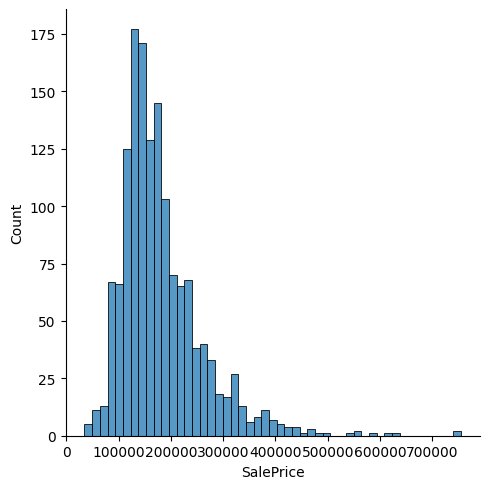

In [30]:
sns.displot(df["SalePrice"])


In [31]:
# TRANSFORMING TARGET VARIABLE
y_train = np.log1p(y_train)

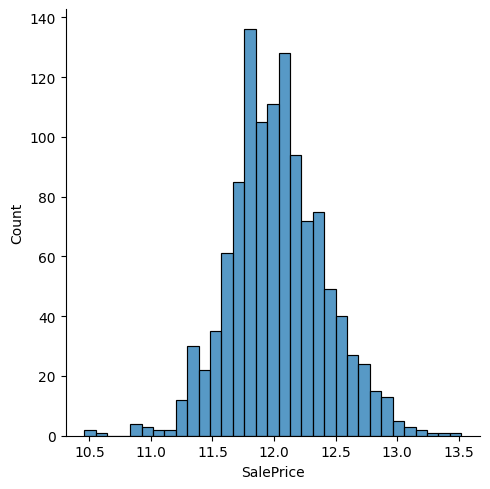

In [32]:
sns.displot(y_train)

In [33]:
skew_f = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','TotRmsAbvGrd','YearBuilt',
           'total_fullbaths','Fireplaces','LotFrontage','WoodDeckSF','OpenPorchSF','LotArea','BsmtUnfSF']

In [34]:
df["total_fullbaths"] = df["BsmtFullBath"] + df["FullBath"] + (0.5*df["BsmtHalfBath"]) + (0.5*df["HalfBath"])

In [35]:
skewness_f = df[skew_f].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Feature': skewness_f.index, 'Skewness': skewness_f.values})
# Display features with high skewness
skewness[abs(skewness['Skewness']) > 1]
skewness

,Feature,Skewness
0,LotArea,12.207688
1,LotFrontage,2.384950
2,OpenPorchSF,2.364342
3,WoodDeckSF,1.541376
4,TotalBsmtSF,1.524255
5,GrLivArea,1.366560
6,BsmtUnfSF,0.920268
7,TotRmsAbvGrd,0.676341
8,Fireplaces,0.649565
9,total_fullbaths,0.264676


In [36]:
def transform_skewed_features(d,scale=0,train_set=False ):
    #skew_flog = ['OverallQual','GrLivArea','TotRmsAbvGrd','YearBuilt','LotFrontage']
    #skew_z = ['GarageCars','TotalBsmtSF','total_fullbaths','Fireplaces','WoodDeckSF','OpenPorchSF','BsmtUnfSF']
    skew_flog = ['GrLivArea','YearBuilt','LotFrontage']
    skew_z = ['TotalBsmtSF','WoodDeckSF','OpenPorchSF','BsmtUnfSF','TotalBsmtSF']
    d['LotArea'] = d['LotArea'].astype(float)
    d['LotArea'] = np.log(d['LotArea'].copy())
    d[skew_flog] = d[skew_flog].astype(float)
    d[skew_flog] = np.sqrt(d[skew_flog].copy())
    if train_set:
        scale = PowerTransformer(method='yeo-johnson')
        d[skew_z] = scale.fit_transform(d[skew_z].copy())
        return d,scale
    else:
        d[skew_z] = scale.transform(d[skew_z].copy())
        return d

## Feature Selection

In [37]:
df_update = df.copy()
df_update,_,_ = Encoding_Categorical(df.copy(),train_set=True)
corr = df_update[df_num].corr()
corr["SalePrice"].abs().sort_values(ascending=False)[:60]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64

In [38]:
cat_only = []
for i in df_update.columns:
    if i not in df_num:
        cat_only.append(i)

In [39]:
cat_only.append('SalePrice')
len(cat_only)

174

In [40]:
corr = df_update[cat_only].corr()
corr["SalePrice"].abs().sort_values(ascending=False)[:30]

SalePrice                1.000000
ExterQual                0.682639
KitchenQual              0.659600
BsmtQual                 0.650138
total_fullbaths          0.631731
GarageFinish_Unf         0.513906
Foundation_PConc         0.497734
HeatingQC                0.427649
GarageFinish_Fin         0.419678
Neighborhood_NridgHt     0.402149
BsmtExposure             0.361863
SaleType_New             0.357509
GarageType_Detchd        0.354141
SaleCondition_Partial    0.352060
Foundation_CBlock        0.343263
Neighborhood_NoRidge     0.330424
Exterior2nd_VinylSd      0.306389
Exterior1st_VinylSd      0.305009
BsmtFinType1             0.298771
MSZoning_RM              0.288065
LotShape                 0.267759
CentralAir               0.251328
MSZoning_RL              0.245063
SaleType_WD              0.242598
Electrical_SBrkr         0.242357
RoofStyle_Hip            0.235897
GarageType_BuiltIn       0.235449
GarageType_Attchd        0.232192
PavedDrive               0.231357
RoofStyle_Gabl

In [41]:
def Model_features(d):
    features = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','TotRmsAbvGrd',
                'YearBuilt','total_fullbaths','Fireplaces','LotFrontage','WoodDeckSF',
                'OpenPorchSF','LotArea','BsmtUnfSF',

           'ExterQual','KitchenQual','BsmtQual','HeatingQC','Neighborhood_NridgHt',
            'BsmtExposure','Exterior','Neighborhood_NoRidge','BsmtFinType1','MSZoning_RM',
            'CentralAir','PavedDrive','Neighborhood_StoneBr','Neighborhood_OldTown',
                'Foundation_CBlock',

           'SaleType_New','GarageType_Detchd','SaleCondition_Partial','Foundation_CBlock',
           'LotShape','Electrical_SBrkr','RoofStyle_Hip','GarageType_BuiltIn','GarageType_Attchd',
           'RoofStyle_Gable','Neighborhood_OldTown','Neighborhood_Somerst','RoofMatl_WdShngl',

           'Neighborhood_Blueste', 'Neighborhood_BrDale','Neighborhood_BrkSide',
            'Neighborhood_Edwards','Neighborhood_IDOTRR','Neighborhood_MeadowV',
            'Neighborhood_NAmes','Neighborhood_Sawyer','Neighborhood_Timber']
    d = d[features]
    return d

# Model Pipeline

In [42]:
def Model_Pipeline(d,s1=0,s2=0,s3=0,s4=0,train_set=False):
    d = Missing_Values(d.copy())
    d = Feature_Engineering(d.copy())
    if train_set:
        d, s1 = transform_skewed_features(d.copy(),train_set=True)
        d, s2, s3 = Encoding_Categorical(d.copy(),train_set=True)
        d = Model_features(d.copy())
        s4 = StandardScaler()
        d = s4.fit_transform(d.copy())
    else:
        d = transform_skewed_features(d.copy(),s1)
        d,_,_ = Encoding_Categorical(d.copy(),s2,s3)
        d = Model_features(d.copy())
        d = s4.transform(d.copy())
    return d,s1,s2,s3,s4

In [43]:
x_train,s1,s2,s3,s4 = Model_Pipeline(x_train.copy(),train_set=True)
x_test,_,_,_,_ = Model_Pipeline(x_test.copy(),s1,s2,s3,s4)

In [44]:
x_train.shape,y_train.shape

((1161, 50), (1161,))

In [45]:
x_test.shape, y_test.shape

((292, 50), (292,))

# Model Selection

## Linear Regression

In [46]:
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
y_pred = np.expm1(y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print(f'Linear Regression - R2 score: {r2}, RMSE: {rmse}')

Linear Regression - R2 score: 0.9310128610189672, RMSE: 23003.344541285227
